# Data Cleaning of Credit Score

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import r

from scipy.stats import mode

In [3]:
DATA_DIR = './'
DATA = 'train.csv'

In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, DATA))
df

/var/folders/rm/1g600byx25b_ht2r9ty6b4_00000gn/T/ipykernel_43639/694345474.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(DATA_DIR, DATA))


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


Null값이 존재. 얼마나 존재하는지 살펴볼 필요가 있음

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [126]:
null_column_list = []
print('Columns that have NULL : \n')
for col, value in df.isnull().sum().items():
    print('{} --> {} nulls'.format(col, value))
    if value != 0:
        null_column_list.append(col)

Columns that have NULL : 

ID --> 0 nulls
Customer_ID --> 0 nulls
Month --> 0 nulls
Name --> 9985 nulls
Age --> 0 nulls
SSN --> 0 nulls
Occupation --> 0 nulls
Annual_Income --> 0 nulls
Monthly_Inhand_Salary --> 15002 nulls
Num_Bank_Accounts --> 0 nulls
Num_Credit_Card --> 0 nulls
Interest_Rate --> 0 nulls
Num_of_Loan --> 0 nulls
Type_of_Loan --> 11408 nulls
Delay_from_due_date --> 0 nulls
Num_of_Delayed_Payment --> 7002 nulls
Changed_Credit_Limit --> 0 nulls
Num_Credit_Inquiries --> 1965 nulls
Credit_Mix --> 0 nulls
Outstanding_Debt --> 0 nulls
Credit_Utilization_Ratio --> 0 nulls
Credit_History_Age --> 9030 nulls
Payment_of_Min_Amount --> 0 nulls
Total_EMI_per_month --> 0 nulls
Amount_invested_monthly --> 4479 nulls
Payment_Behaviour --> 0 nulls
Monthly_Balance --> 1200 nulls
Credit_Score --> 0 nulls


In [127]:
null_column_list

['Name',
 'Monthly_Inhand_Salary',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Num_Credit_Inquiries',
 'Credit_History_Age',
 'Amount_invested_monthly',
 'Monthly_Balance']

또한 Null값이 아니더라도 데이터 기록이 사실상 결측치인 경우가 있음.

예를 들면,
- Social Security Number(SSN)의 값이 일반적이 형태가 아닌 `#F%$D@*&8` 와 같은 아무 의미 없는 값으로 들어가 있는 데이터 포인트가 있음. 물론 SSN은 개인 식별자로 분석과 아무런 관련이 없다고 볼 수 있다.
- occupation과 같은 부분도 일반적인 형태의 널값이 아닌 `------`등과 같은 표기로 직업을 모르는 사람들의 값이 채워져있는 것으로 보임
-

In [11]:
df['Occupation'].value_counts()

_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: Occupation, dtype: int64

In [12]:
df['Age'].describe()

count     100000
unique      1788
top           38
freq        2833
Name: Age, dtype: object

In [21]:
# 정규 표현식 활용
df.loc[ df['Age'].str.contains(r'[^0-9]'), 'Age' ].value_counts()

-500     886
38_      161
24_      161
29_      160
26_      153
        ... 
1248_      1
3055_      1
6666_      1
2463_      1
4808_      1
Name: Age, Length: 128, dtype: int64

Age는 binning 진행
1. `_` 로 split, 첫번째 요소로 해당 값 보간
2. `Age`가 100 이상 넘어가는 것들은 0으로 치환 또는 100으로 치환
3. 적당한 binning criteria를 찾아서 구간대별로 끊어준다

In [27]:
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [24]:
df.loc[ df['Age'].str.contains(r'[^0-9]'), : ]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
54,0x1650,CUS_0x284a,July,Nadiaq,34_,#F%$D@*&8,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
58,0x1658,CUS_0x5407,March,Annk,30_,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
71,0x1669,CUS_0x4157,August,Charlie Zhur,24_,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,27.813354,21 Years and 11 Months,No,226.892792,254.57176724837916,High_spent_Large_value_payments,742.9221908300779,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99933,0x25f8b,CUS_0xb11c,June,Yinka Adegokej,38_,546-94-4789,Manager,15319.65,1460.637500,6,...,Bad,1453.61,24.846424,11 Years and 2 Months,Yes,28.182033,45.61171819143637,High_spent_Small_value_payments,332.269998,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48_,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


Age 결측치 보간 방안 (같은 entity - 즉 같은 고객)에 대해 값 차이가 1이상 있으면 안됨. 전후 살펴서 보간 할것

`Age` 1차 전처리 `_` 제거

In [54]:
age_series = df['Age'].str.split('_').apply(lambda x: x[0]).astype(np.float64)
age_series
# age_list.astype(int)
# print(type(age_series))

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [55]:
df['Age'] = age_series
df['Age']

0         23.0
1         23.0
2       -500.0
3         23.0
4         23.0
         ...  
99995     25.0
99996     25.0
99997     25.0
99998     25.0
99999     25.0
Name: Age, Length: 100000, dtype: float64

In [57]:
# 모든 고객에 대해서 Age값이 있는 것을 확인
df.groupby('Customer_ID')['Age'].count().value_counts()

8    12500
Name: Age, dtype: int64

In [62]:
# 한살 차이까지는 괜찮음. 국제 나이이기 때문에 1월부터 8월까지 나이가 증가할 수는 있음. 하지만 그 이상의 차이가 난다거나, 한살 차이가 두번 씩 난다면 결측으로 치부하고,
# 일정 룰에 입각해서 최빈값으로 보간을 해줘야한다
age_by_cus = df.groupby('Customer_ID')['Age'].apply(np.unique)
age_by_cus

Customer_ID
CUS_0x1000            [17.0, 18.0]
CUS_0x1009            [25.0, 26.0]
CUS_0x100b            [18.0, 19.0]
CUS_0x1011            [43.0, 44.0]
CUS_0x1013            [43.0, 44.0]
                      ...         
CUS_0xff3                   [55.0]
CUS_0xff4     [-500.0, 36.0, 37.0]
CUS_0xff6             [18.0, 19.0]
CUS_0xffc             [17.0, 18.0]
CUS_0xffd             [29.0, 30.0]
Name: Age, Length: 12500, dtype: object

In [64]:
type(age_by_cus)

pandas.core.series.Series

In [71]:
customer_list = []
for idx, age_list in age_by_cus.items():
    # print(idx)
    # print(age_list)
    # break
    if abs(age_list[0] - age_list[-1]) not in [0., 1.]:
        print("{} : {}".format(idx, age_list))
        customer_list.append(idx)

CUS_0x1015 : [  27. 4510.]
CUS_0x1032 : [  40. 1853.]
CUS_0x1048 : [  26.   27. 1217.]
CUS_0x104a : [-500.   36.   37.]
CUS_0x104f : [  19.   20. 2074.]
CUS_0x1051 : [  41.   42. 4083.]
CUS_0x105c : [  54. 4746.]
CUS_0x109d : [-500.   44.   45.]
CUS_0x109f : [  40.   41. 7133.]
CUS_0x10dd : [-500.   24.   25.]
CUS_0x10e7 : [  19. 3450. 3843.]
CUS_0x10f9 : [  53.   54. 8490.]
CUS_0x1119 : [  35.   36. 5074.]
CUS_0x1132 : [  39. 2406.]
CUS_0x115c : [  19.   20. 4556.]
CUS_0x1169 : [  33.   34. 2343.]
CUS_0x1184 : [  49. 1388.]
CUS_0x1190 : [  44.   45. 5909.]
CUS_0x1192 : [  46.   47. 5498.]
CUS_0x1197 : [-500.   28.]
CUS_0x11ac : [  25.   26. 4879.]
CUS_0x11c6 : [  48.   49. 1006.]
CUS_0x11eb : [  23.   24. 3553. 8080.]
CUS_0x11ec : [  34. 8518.]
CUS_0x11fc : [  30. 6632.]
CUS_0x1207 : [  33.   34. 1357. 3284.]
CUS_0x122f : [ 23.  24. 236.]
CUS_0x1231 : [  38.   39. 6427.]
CUS_0x123d : [-500.   31.]
CUS_0x124a : [  28. 1206.]
CUS_0x1252 : [  28. 4576.]
CUS_0x1258 : [-500.   49.   50.]
C

In [72]:
len(customer_list)

2530

In [76]:
df[ (df['Age'] > 100) | (df['Age'] < 0) ]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
56,0x1656,CUS_0x5407,January,Annk,7580.0,500-92-6408,Media_Manager,34081.38_,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
113,0x16ab,CUS_0xff4,February,NaN,-500.0,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
122,0x16b8,CUS_0x33d2,March,Chalmersa,181.0,965-46-2491,Scientist,31993.78,2942.148333,6,...,Standard,818.22,27.380109,17 Years and 0 Months,Yes,45.141298,264.25708850339777,Low_spent_Small_value_payments,274.8164466052998,Standard
219,0x1749,CUS_0x3edc,April,Williamso,995.0,663-16-3845,Accountant,43070.24,3622.186667,3,...,Standard,1233.1,24.331772,19 Years and 5 Months,Yes,30.576085,74.92037487328841,High_spent_Medium_value_payments,506.7222069702167,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99913,0x25f6f,CUS_0x1619,February,Phil Wahbao,2263.0,683-59-7399,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,25.982154,16 Years and 4 Months,No,45.076827,74.71358019803843,High_spent_Small_value_payments,292.576093,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500.0,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99950,0x25fa4,CUS_0x51b3,July,Ryana,1342.0,837-85-9800,Media_Manager,59146.36,4908.863333,3,...,_,418.03,38.199635,20 Years and 7 Months,No,26.778419,502.3763201756033,Low_spent_Small_value_payments,251.731594,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,-500.0,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard


약 2530명의 고객이 말도 안되는 나이 값을 갖고 있음.

가장 쉬운 보간 방식은 age binning하면 됨. 또는 음수나 말도 안되게 큰 양수에 대해서 히스토그램으로 쳐내자

In [88]:
age_by_cus_series = df.groupby('Customer_ID')['Age'].apply(list)
age_by_cus_series

Customer_ID
CUS_0x1000     [17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
CUS_0x1009     [25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]
CUS_0x100b     [18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0]
CUS_0x1011     [43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
CUS_0x1013     [43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
                                    ...                        
CUS_0xff3      [55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0]
CUS_0xff4     [36.0, -500.0, 37.0, 37.0, 37.0, 37.0, 37.0, 3...
CUS_0xff6      [18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0]
CUS_0xffc      [17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
CUS_0xffd      [29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0]
Name: Age, Length: 12500, dtype: object

<AxesSubplot:>

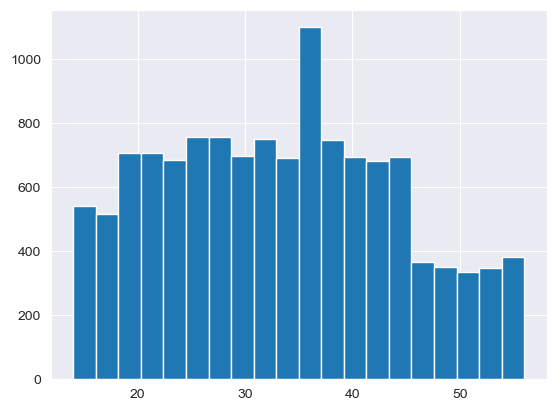

In [92]:
age_by_cus_series.apply(lambda x: mode(x)[0][0]).hist(bins=20)

자, 여러개 고민할 필요없이 mode로 보간하면 된다

In [95]:
print('min age : ', np.min(age_by_cus_series.apply(lambda x: mode(x)[0][0])))
print('max age : ', np.max(age_by_cus_series.apply(lambda x: mode(x)[0][0])))

min age :  14.0
max age :  56.0


In [98]:
age_by_cus_series

Customer_ID
CUS_0x1000     [17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
CUS_0x1009     [25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]
CUS_0x100b     [18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0]
CUS_0x1011     [43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
CUS_0x1013     [43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
                                    ...                        
CUS_0xff3      [55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0]
CUS_0xff4     [36.0, -500.0, 37.0, 37.0, 37.0, 37.0, 37.0, 3...
CUS_0xff6      [18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0]
CUS_0xffc      [17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
CUS_0xffd      [29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0]
Name: Age, Length: 12500, dtype: object

In [101]:
def age_transformer(li):
    from scipy.stats import mode
    result = []
    for age in li:
        if (age < 14.0) or (age > 56.0):
            result.append(mode(li)[0][0])
        else:
            result.append(age)

    return result

In [102]:
age_by_cus_series.apply(lambda x : age_transformer(x))

Customer_ID
CUS_0x1000    [17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
CUS_0x1009    [25.0, 25.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0]
CUS_0x100b    [18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0]
CUS_0x1011    [43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
CUS_0x1013    [43.0, 43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
                                    ...                       
CUS_0xff3     [55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0, 55.0]
CUS_0xff4     [36.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
CUS_0xff6     [18.0, 18.0, 18.0, 19.0, 19.0, 19.0, 19.0, 19.0]
CUS_0xffc     [17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0]
CUS_0xffd     [29.0, 29.0, 29.0, 29.0, 29.0, 29.0, 30.0, 30.0]
Name: Age, Length: 12500, dtype: object

마찬가지로 `Name` column에서도 age처럼 null값에 대해 처리해줄 필요가 있다

In [103]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23.0,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25.0,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [105]:
# df 내 최대 최솟값
def get_group_min_max(df, groupby, column):
    cur = df[ df[column].notna() ].groupby(groupby)[column].apply(list)
    x, y = cur.apply(lambda x: mode(x)).apply([min, max])
    return x[0][0], y[0][0]

get_group_min_max(df, 'Customer_ID', 'Age')


(14.0, 56.0)

In [115]:
def fill_mode(df, groupby, column, inplace=True):
    dropped_df = df[ df[column].notna() ].groupby(groupby)[column].apply(list)
    x, y = dropped_df.apply(lambda x: mode(x)).apply([min, max])
    minimum, maximum = x[0][0], y[0][0]

    # assign NaN to out-of-range values
    col = df[column].apply(lambda x: np.NaN if ((x < minimum) | (x > maximum)) else x)
    print(len(col))

    # fill local mode
    local_mode = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
    print(len(local_mode))

    result = col.fillna(local_mode)

    if inplace:
        df[column] = result
    else:
        return result

In [124]:
fill_mode(df, 'Customer_ID', 'Age', True)

100000
100000


In [125]:
df.groupby('Customer_ID')['Age'].apply(lambda x: x[:10])

0        23.0
1        23.0
2        23.0
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

In [117]:
# df.groupby('Customer_ID')['Age'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

0        23.0
1        23.0
2        23.0
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

train과 test split할 때는 고객 데이터의 시계열성을 고려해서 작업해야할 수 있음

12500명의 고객마다 총 8개월치의 데이터를 갖고 분석이 진행되었음 -> 따라서 `12500 x 8 = 100000`

따라서 시계열성을 고려한다면, train_test_split시 마지막 (n * 8)개 행을 분리하는 방향으로 분할 진행